# Analyse des statistiques des Pok√©mons

Ce projet vise √† explorer les statistiques de base des Pok√©mons afin de r√©pondre √† la probl√©matique suivante :

**Y a-t-il une diff√©rence de stat notable entre les Pok√©mons qui ont une √©volution et ceux qui n'en ont pas, de mani√®re √† optimiser la s√©lection de Pok√©mon pour un rush jusqu'√† la league Pokemon ?**

Pour y r√©pondre, nous allons :
- Distinguer les Pok√©mons l√©gendaires/fabuleux des autres, car ils ont un profil statistique bien plus √©lev√©.
- Normaliser les donn√©es en uniformisant les formes alternatives en leur forme g√©n√©rale ou en les supprimant. Cela permet de ne pas √™tre fauss√© sur ces Pok√©mons √©tant donn√© que notre sujet est le rush d'un jeux Pok√©mons.
- S√©parer les Pok√©mons non l√©gendaires selon leur nombre d‚Äô√©volutions (aucune, une ou deux), les √©volutions √©tant des cas exceptionnels chez les Pok√©mons l√©gendaires, on consid√®re que tous les Pok√©mons l√©gendaires n'√©voluent pas.
- Comparer les totaux de statistiques de base entre les cat√©gories qui √©voluent et celles qui n'√©voluent pas, √† travers divers graphiques (nuages de points, barplots, violins plots, etc.).

L‚Äôanalyse visuelle et statistique permettra de mieux comprendre l‚Äôimpact de l‚Äô√©volution sur la puissance d‚Äôun Pok√©mon.

Nos r√©ponses √† cette question se baseront sur des donn√©es venant d'un dataset trouv√© sur internet et qui repr√©sente vraiment tous les pokemon pr√©sent dans les jeux.     
Pour les commentaires, nous les avons √©crit en fran√ßais tout comme le reste du projet.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

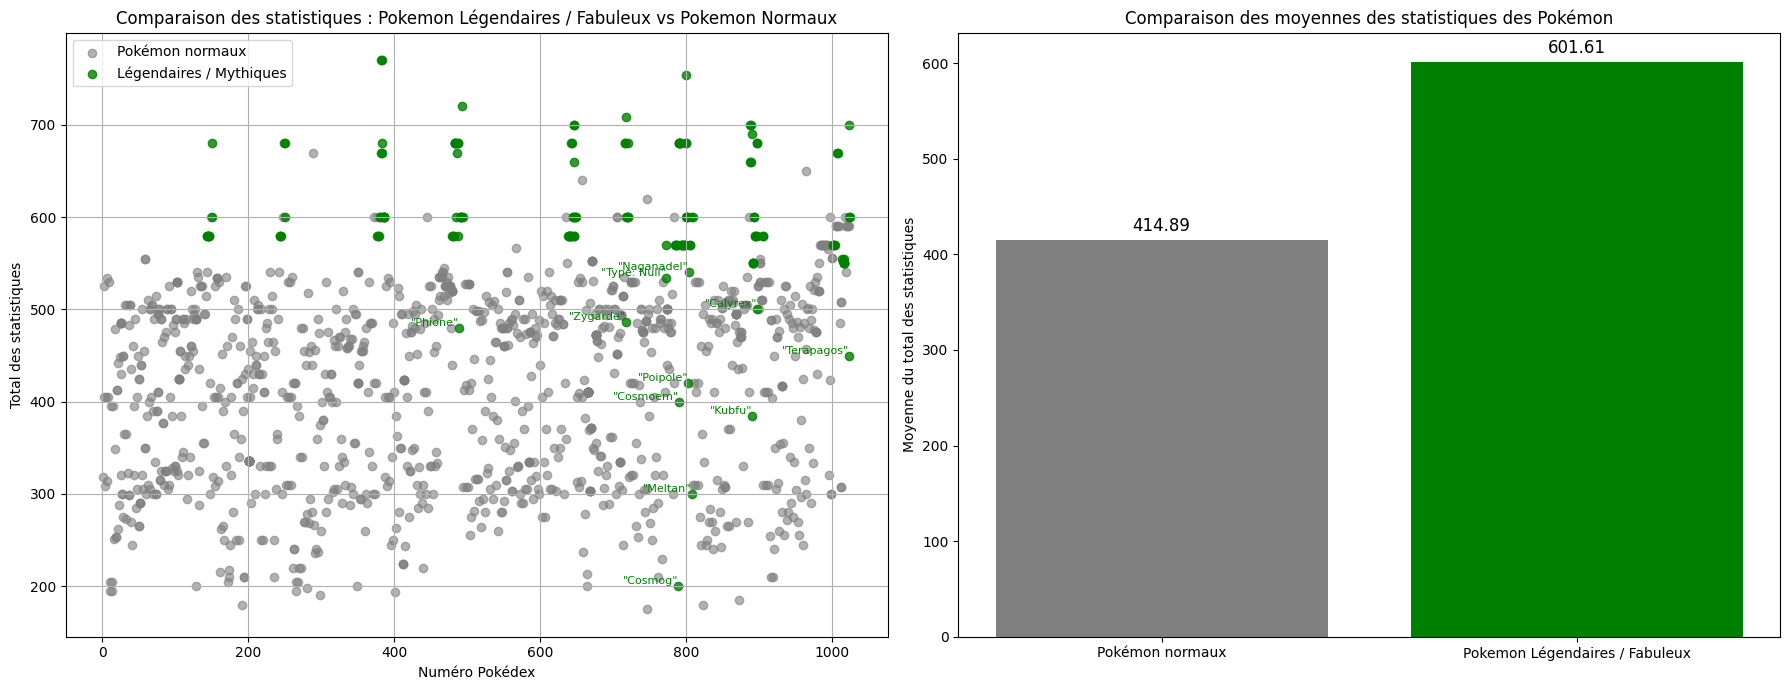

In [ ]:
# Charger les donn√©es
file_path = 'Dataset/PokemonDatabase.csv'
df = pd.read_csv(file_path)

# Nettoyage
df = df[~df["Alternate Form Name"].astype(str).str.contains("Mega|Gigantamax|Eternamax", na=False)] # g√®re les formes
df.loc[df["Pokemon Name"].str.startswith('"Unown'), "Pokemon Name"] = '"Unown"' # g√®re les Zarbis

# Nettoyage des valeurs de "Legendary Type"
df["Legendary Type"] = df["Legendary Type"].astype(str).str.replace('"', '').str.strip()

# D√©finition des Pokemon L√©gendaires / Fabuleux et Pokemon normaux
legendary_types = ["Legendary", "Mythical", "Sub-Legendary"]
df_legendary_pokemon = df["Legendary Type"].isin(legendary_types)

# Cr√©ation du scatter plot
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

# Affichage des Pok√©mon normaux (gris)
ax[0].scatter(df.loc[~df_legendary_pokemon, "Pokedex Number"],
              df.loc[~df_legendary_pokemon, "Base Stat Total"],
              color="gray", label="Pok√©mon normaux", alpha=0.6)

# Affichage des Pok√©mon Pokemon L√©gendaires / Fabuleux (verts)
ax[0].scatter(df.loc[df_legendary_pokemon, "Pokedex Number"],
              df.loc[df_legendary_pokemon, "Base Stat Total"],
              color="green", label="L√©gendaires / Mythiques", alpha=0.8)

# Affichage des noms des Pok√©mon dont le "Base Stat Total" est inf√©rieur √† 550
for _, row in df[(df["Base Stat Total"] < 550) & df_legendary_pokemon].iterrows():
    ax[0].text(row["Pokedex Number"], row["Base Stat Total"], row["Pokemon Name"],
               fontsize=8, ha='right', va='bottom', color='green')

# Titres et l√©gendes pour le scatter plot
ax[0].set_xlabel("Num√©ro Pok√©dex")
ax[0].set_ylabel("Total des statistiques")
ax[0].set_title("Comparaison des statistiques : Pokemon L√©gendaires / Fabuleux vs Pokemon Normaux")
ax[0].legend()
ax[0].grid(True)

# Calcul des moyennes des stats des Pok√©mon Pokemon L√©gendaires / Fabuleux et normaux
mean_legendary = df[df_legendary_pokemon]["Base Stat Total"].mean()
mean_normal = df[~df_legendary_pokemon]["Base Stat Total"].mean()

# Cr√©ation de l'histogramme des moyennes
bars = ax[1].bar(["Pok√©mon normaux", "Pokemon L√©gendaires / Fabuleux"], [mean_normal, mean_legendary], color=['gray', 'green'])

# Affichage des valeurs sur l'histogramme
for bar in bars:
    yval = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width() / 2, yval + 5, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Ajout des titres et l√©gendes pour l'histogramme
ax[1].set_ylabel("Moyenne du total des statistiques")
ax[1].set_title("Comparaison des moyennes des statistiques des Pok√©mon")

# Affichage du graphique
plt.tight_layout()
plt.show()


### Int√©r√™t du graphique et Analyse ###

Ces graphiques ont pour but de montrer s'il existe une diff√©rence de statistique totale notable entre les Pok√©mons l√©gendaires/fabuleux et le reste des Pok√©mons.

Gr√¢ce au nuage de point (graph gauche) il est facile d'observer une segmentation nette √† environ 550 pour le total des statistiques, o√π on remarque que les l√©gendaires sont majoritairement au dessus de ce seuil et le reste des Pok√©mons majoritairement en dessous.
Seules quelques exceptions de Pok√©mons non-l√©gendaires/fabuleux d√©passent un total de statistiques de 550, ils sont regroup√©s dans la cat√©gorie des types dragons qui sont les seuls √† avoir une r√©putation d'avoir plus de statistiques que la moyenne globale. Concernant les Pok√©mons l√©gendaires/fabuleux les exceptions sont des Pok√©mons partiellement complet (Zygarde 5%) ou des formes qui servent √† l'histoire du jeux et donc qui ne sont jouables que lors de leur derni√®re forme (Cosmog, Cosmoen, Phione, Meltan, Kubfu, terapagos, V√©mini), sur le graphique ils ont √©t√© mis en lumi√®re pour pouvoir comprendre leur cas unique.   
Ce graphique permet donc de confirmer que les Pok√©mon l√©gendaires sont globalement bien plus puissants et doivent donc √™tre √©tudi√©s √† part des Pokemon non-l√©gendaires dans l‚Äôanalyse.

Le BarPlot (graph droite) permet de visuellement bien voir la sup√©riorit√© global des Pok√©mons l√©gendaires/fabuleux sur le reste des Pok√©mons gr√¢ce √† la moyenne des statistique de chaque cat√©gorie. Avec 185 points de statistiques en plus pour les Pok√©mons l√©gendaires/fabuleux soit un √©quivalent de 145% des stats des Pok√©mons non l√©gendaires/fabuleux.

Dans l'optique d'un rush, nous devons suivre l'histoire du jeux, tr√®s souvent li√©e √† un/plusieurs Pok√©mon l√©gendaires. Le sc√©nario est toujours le m√™me, peu importe la version : les Pok√©mons l√©gendaires ne sont obtenables qu'en fin de partie (tout de m√™me avant la league). Nous ne pouvons donc pas simplement en remplir notre √©quipe d√®s le d√©but de partie, et nous devons composer avec des Pok√©mons non-l√©gendaires.

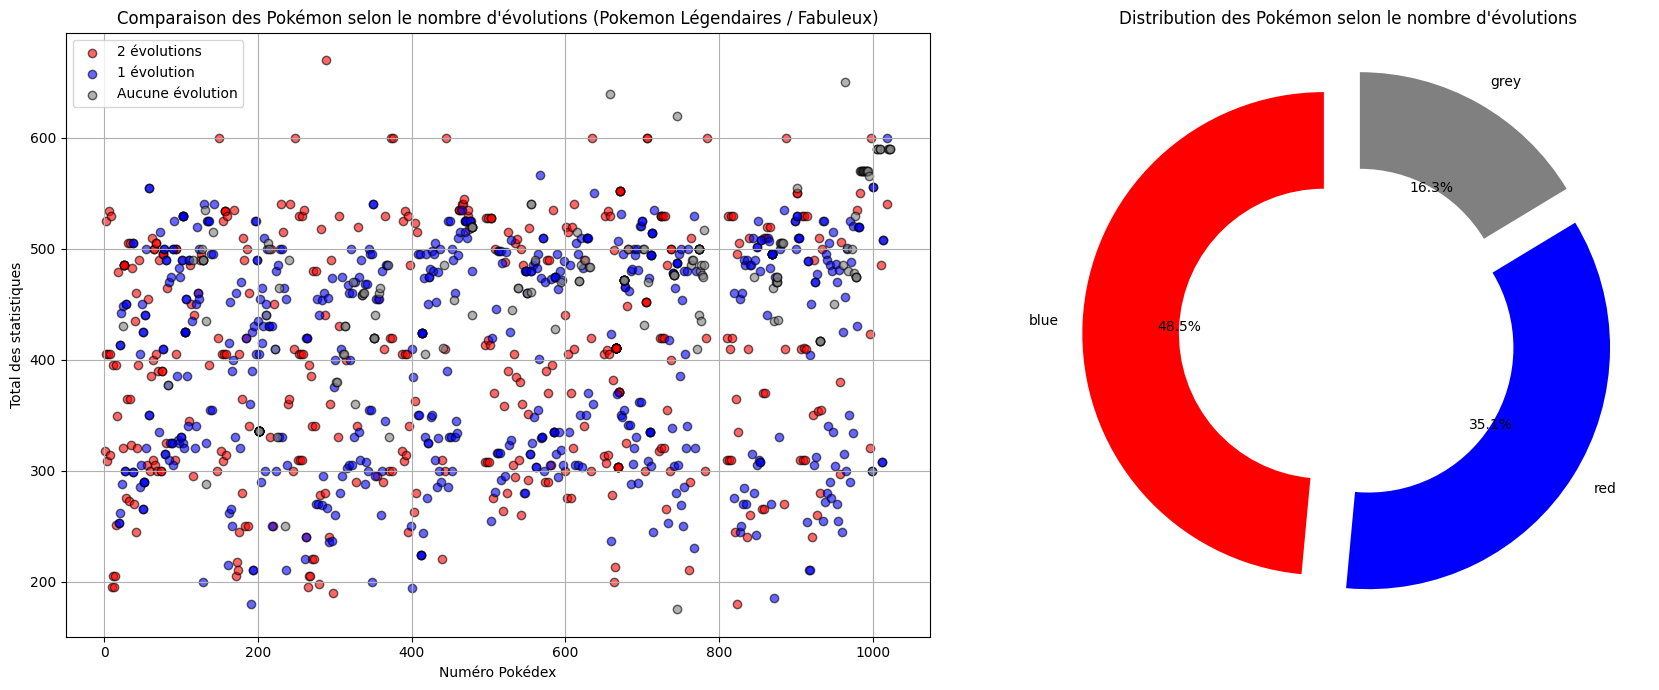

In [5]:
# Exclure les Pok√©mon Pokemon L√©gendaires / Fabuleux
df_base_pokemon = df[~df_legendary_pokemon].copy()  # Cr√©ation d'une copie


# Cr√©er un dictionnaire pour mapper les IDs d'√©volution
pokemon_id_dict = dict(zip(df_base_pokemon["Pokemon Id"], df_base_pokemon["Pokemon Name"]))

# Fonction pour trouver la cha√Æne d'√©volution √† partir d'un Pok√©mon donn√©
def get_evolution_chain(pokemon_id, df):
    chain = [pokemon_id]
    current_pokemon = df_base_pokemon[df_base_pokemon["Pokemon Id"] == pokemon_id]

    # Remonter la cha√Æne d'√©volution en suivant les pr√©-√©volutions
    while not current_pokemon["Pre-Evolution Pokemon Id"].isnull().values[0]:
        pre_evolution_id = current_pokemon["Pre-Evolution Pokemon Id"].values[0]
        chain.append(pre_evolution_id)
        current_pokemon = df_base_pokemon[df_base_pokemon["Pokemon Id"] == pre_evolution_id]

    return chain

# Cr√©er une colonne pour stocker la couleur des points
df_base_pokemon['Color'] = 'grey'  # Initialisation avec 'grey' (aucune √©volution)

# Mettre √† jour la couleur pour les Pok√©mon selon la cha√Æne d'√©volutions
for _, row in df_base_pokemon.iterrows():
    chain = get_evolution_chain(row["Pokemon Id"], df_base_pokemon)
    # Si la cha√Æne contient 3 Pok√©mon (2 √©volutions), colorier en rouge
    if len(chain) == 3:
        df_base_pokemon.loc[df_base_pokemon["Pokemon Id"].isin(chain), 'Color'] = 'red'
    # Si la cha√Æne contient 2 Pok√©mon (1 √©volution), colorier en bleu
    elif len(chain) == 2:
        df_base_pokemon.loc[df_base_pokemon["Pokemon Id"].isin(chain), 'Color'] = 'blue'

# Affichage du nombre de chaque couleur
color_counts = df_base_pokemon['Color'].value_counts()
#print("Nombre de Pok√©mon par couleur :")
#print(color_counts)

# Cr√©ation du graphique
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

# Premi√®re partie : Nuage de points
# Affichage des Pok√©mon avec la couleur de la cha√Æne d'√©volution
scatter_red = ax[0].scatter(df_base_pokemon.loc[df_base_pokemon['Color'] == 'red', "Pokedex Number"],
                            df_base_pokemon.loc[df_base_pokemon['Color'] == 'red', "Base Stat Total"],
                            color='red', label='2 √©volutions', alpha=0.6, edgecolors='black')

scatter_blue = ax[0].scatter(df_base_pokemon.loc[df_base_pokemon['Color'] == 'blue', "Pokedex Number"],
                             df_base_pokemon.loc[df_base_pokemon['Color'] == 'blue', "Base Stat Total"],
                             color='blue', label='1 √©volution', alpha=0.6, edgecolors='black')

scatter_grey = ax[0].scatter(df_base_pokemon.loc[df_base_pokemon['Color'] == 'grey', "Pokedex Number"],
                              df_base_pokemon.loc[df_base_pokemon['Color'] == 'grey', "Base Stat Total"],
                              color='grey', label='Aucune √©volution', alpha=0.6, edgecolors='black')

# Titres et l√©gendes
ax[0].set_xlabel("Num√©ro Pok√©dex")
ax[0].set_ylabel("Total des statistiques")
ax[0].set_title("Comparaison des Pok√©mon selon le nombre d'√©volutions (Pokemon L√©gendaires / Fabuleux)")

# Affichage de la l√©gende
ax[0].legend()
ax[0].grid(True)

# Deuxi√®me partie : Donut Chart
# Cr√©ation du donut chart
labels = color_counts.index
sizes = color_counts.values
explode = (0.1, 0.1, 0.1)  # S√©paration des tranches pour l'effet visuel

ax[1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'blue', 'grey'], explode=explode, wedgeprops={'width': 0.4})
ax[1].set_title("Distribution des Pok√©mon selon le nombre d'√©volutions")

# Affichage du graphique
plt.tight_layout()
plt.show()


### Int√©r√™t du graphique et Analyse ###

Ces graphiques montrent la r√©partition de tous les Pok√©mons (l√©gendaires compris) en fonction de leur nombre d‚Äô√©volutions.

- **Nuage de points (gauche)** : On visualise chaque Pok√©mon selon son num√©ro de Pok√©dex et son total de statistiques de base. Les couleurs correspondent au nombre d‚Äô√©volutions :
  - üî¥ Rouge : Pok√©mon avec deux √©volutions
  - üîµ Bleu : Pok√©mon avec une seule √©volution
  - ‚ö´ Gris : Pok√©mon sans √©volution

On observe que plus un Pok√©mon poss√®de d‚Äô√©volutions, plus il tend √† avoir un total de statistiques √©lev√©. Ceux avec deux √©volutions atteignent globalement de meilleurs scores. L√† o√π les Pok√©mons n'ayant qu'une seule √©volution sont plut√¥t sur un total des statistiques √† 500 et 300, et les Pok√©mons sans √©volution sont plus bas en termes de statistiques, sauf pour quelques exceptions.

- **Donut Chart (droite)** : Ce diagramme circulaire donne un aper√ßu de la distribution des Pok√©mons selon leur nombre d‚Äô√©volutions. On voit une majorit√© de Pok√©mons ayant deux √©volutions, suivis de ceux avec une, et enfin, une minorit√© qui ceux sans aucune √©volution.


La distribution des Pok√©mons en fonction de leur √©volution montre qu'il est plus facile de trouver des Pok√©mons ayant deux √©volutions par rapport aux autres. En effet avec une pr√©sence d'un Pok√©mon sur deux ayant deux √©volutions, trouver ce type de Pok√©mon peut importe le jeux et le moment de la partie o√π le rush s'effectue est plus facile. Nous aurons alors plus de choix sur quel Pok√©mon utiliser selon la situation rencontr√©e dans la partie. Car bien qu'un point fondamental, les statistiques ne sont pas le seul facteur de puissance d'un Pok√©mon dans un contexte (type et talent).

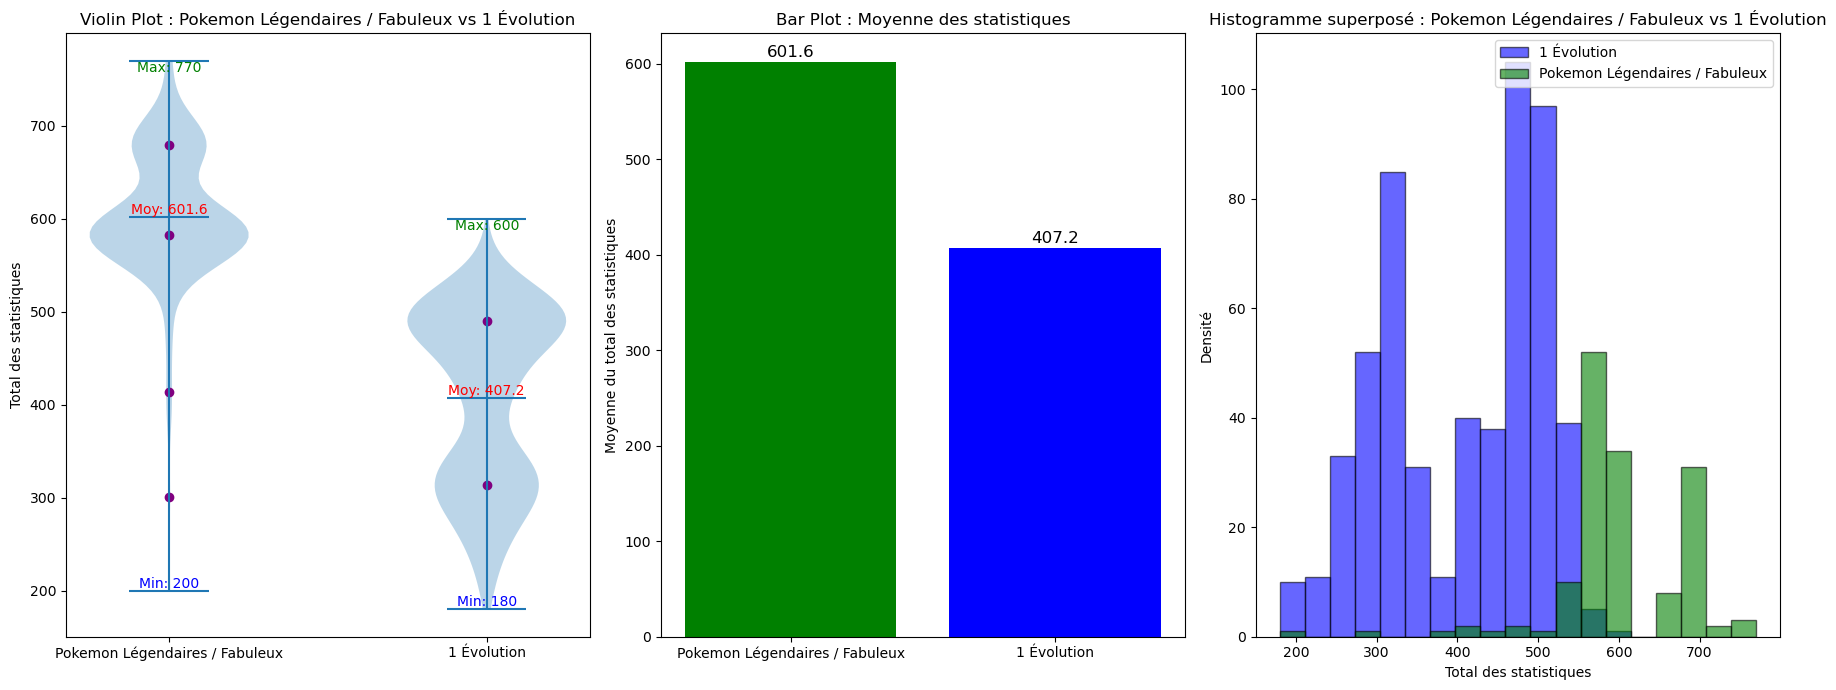

In [34]:
# Filtrer les Pok√©mon Pokemon L√©gendaires / Fabuleux et ceux ayant 1 √©volution
df_single_evolution = df_base_pokemon[df_base_pokemon['Color'] == 'blue']  # Pok√©mon avec 1 √©volution
df_legendary_pokemon = df[df_legendary_pokemon]  # Fait gaffe √† ce que df_legendary_pokemon soit d√©j√† bien filtr√©

# Extraire les valeurs pour les statistiques de base
stats_single_evolution = df_single_evolution['Base Stat Total'].values
stats_legendary = df_legendary_pokemon['Base Stat Total'].values

# Calcul des statistiques pour affichage
mean_stats = [np.mean(stats_legendary), np.mean(stats_single_evolution)]
min_stats = [np.min(stats_legendary), np.min(stats_single_evolution)]
max_stats = [np.max(stats_legendary), np.max(stats_single_evolution)]

# Fonction pour trouver les pics (modes)
def find_peaks(data):
    kde = gaussian_kde(data)  # Densit√© de probabilit√©
    x_vals = np.linspace(min(data), max(data), 1000)
    y_vals = kde(x_vals)

    peak_indices = np.where((y_vals[1:-1] > y_vals[:-2]) & (y_vals[1:-1] > y_vals[2:]))[0] + 1
    peaks = x_vals[peak_indices]

    return peaks

peaks_legendary = find_peaks(stats_legendary)
peaks_single_evolution = find_peaks(stats_single_evolution)

# Cr√©ation du graphique
fig, ax = plt.subplots(1, 3, figsize=(18, 7))

# 1. Violin Plot avec stats et pics
parts = ax[0].violinplot([stats_legendary, stats_single_evolution], showmeans=True, showextrema=True)

# Ajouter les valeurs min, max et moyennes
for i, (mean, min_val, max_val, peaks) in enumerate(zip(mean_stats, min_stats, max_stats, [peaks_legendary, peaks_single_evolution]), start=1):
    ax[0].text(i, mean, f'Moy: {mean:.1f}', ha='center', va='bottom', fontsize=10, color='red')
    ax[0].text(i, min_val, f'Min: {min_val}', ha='center', va='bottom', fontsize=10, color='blue')
    ax[0].text(i, max_val, f'Max: {max_val}', ha='center', va='top', fontsize=10, color='green')

    # Ajouter les pics (modes)
    for peak in peaks:
        ax[0].scatter(i, peak, color='purple', marker='o', label='Pic' if i == 1 else "")

ax[0].set_xticks([1, 2])
ax[0].set_xticklabels(["Pokemon L√©gendaires / Fabuleux", "1 √âvolution"])
ax[0].set_title("Violin Plot : Pokemon L√©gendaires / Fabuleux vs 1 √âvolution")
ax[0].set_ylabel("Total des statistiques")

# 2. Bar Plot avec affichage des valeurs pr√©cises
bars = ax[1].bar(["Pokemon L√©gendaires / Fabuleux", "1 √âvolution"], mean_stats, color=['green', 'blue'])

# Ajouter les valeurs des moyennes sur les barres
for bar, value in zip(bars, mean_stats):
    ax[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{value:.1f}', ha='center', fontsize=12)

ax[1].set_title("Bar Plot : Moyenne des statistiques")
ax[1].set_ylabel("Moyenne du total des statistiques")

# 3. Histogramme superpos√©
bins = np.linspace(min(min(stats_single_evolution), min(stats_legendary)),
                   max(max(stats_single_evolution), max(stats_legendary)), 20)

ax[2].hist(stats_single_evolution, bins=bins, color='blue', alpha=0.6, label="1 √âvolution", edgecolor='black')
ax[2].hist(stats_legendary, bins=bins, color='green', alpha=0.6, label="Pokemon L√©gendaires / Fabuleux", edgecolor='black')

ax[2].set_title("Histogramme superpos√© : Pokemon L√©gendaires / Fabuleux vs 1 √âvolution")
ax[2].set_xlabel("Total des statistiques")
ax[2].set_ylabel("Densit√©")
ax[2].legend()

# Affichage du graphique
plt.tight_layout()
plt.show()


### Int√©r√™t du graphique et Analyse ###

Ces trois graphiques permettent de comparer les statistiques entre les Pok√©mons l√©gendaires/fabuleux et les Pok√©mons non l√©gendaires ayant une seule √©volution.

- **Violin Plot (gauche)** : Ce graphique illustre la distribution des totaux de statistiques. Les l√©gendaires ont une concentration plus haute, avec une moyenne significativement sup√©rieure. Les pics (modes) sont √©galement visibles, signalant des zones o√π les totaux de stats sont fr√©quents : 600 et plus pour les l√©gendaires et 500 et moins pour les Pok√©mons √† une √©volution.
- **Bar Plot (centre)** : Ce graphique compare directement les moyennes de statistiques. Les Pok√©mons l√©gendaires d√©passent clairement ceux qui n'ont qu'une seule √©volution avec une diff√©rence de 194 points.
- **Histogramme (droite)** : Ce graphique montre les distributions. Encore une fois, les Pok√©mons l√©gendaire sont clairement d√©cal√©s vers des valeurs plus √©lev√©es (550 et plus) par rapport aux Pok√©mons √† une √©volution (550 et moins).


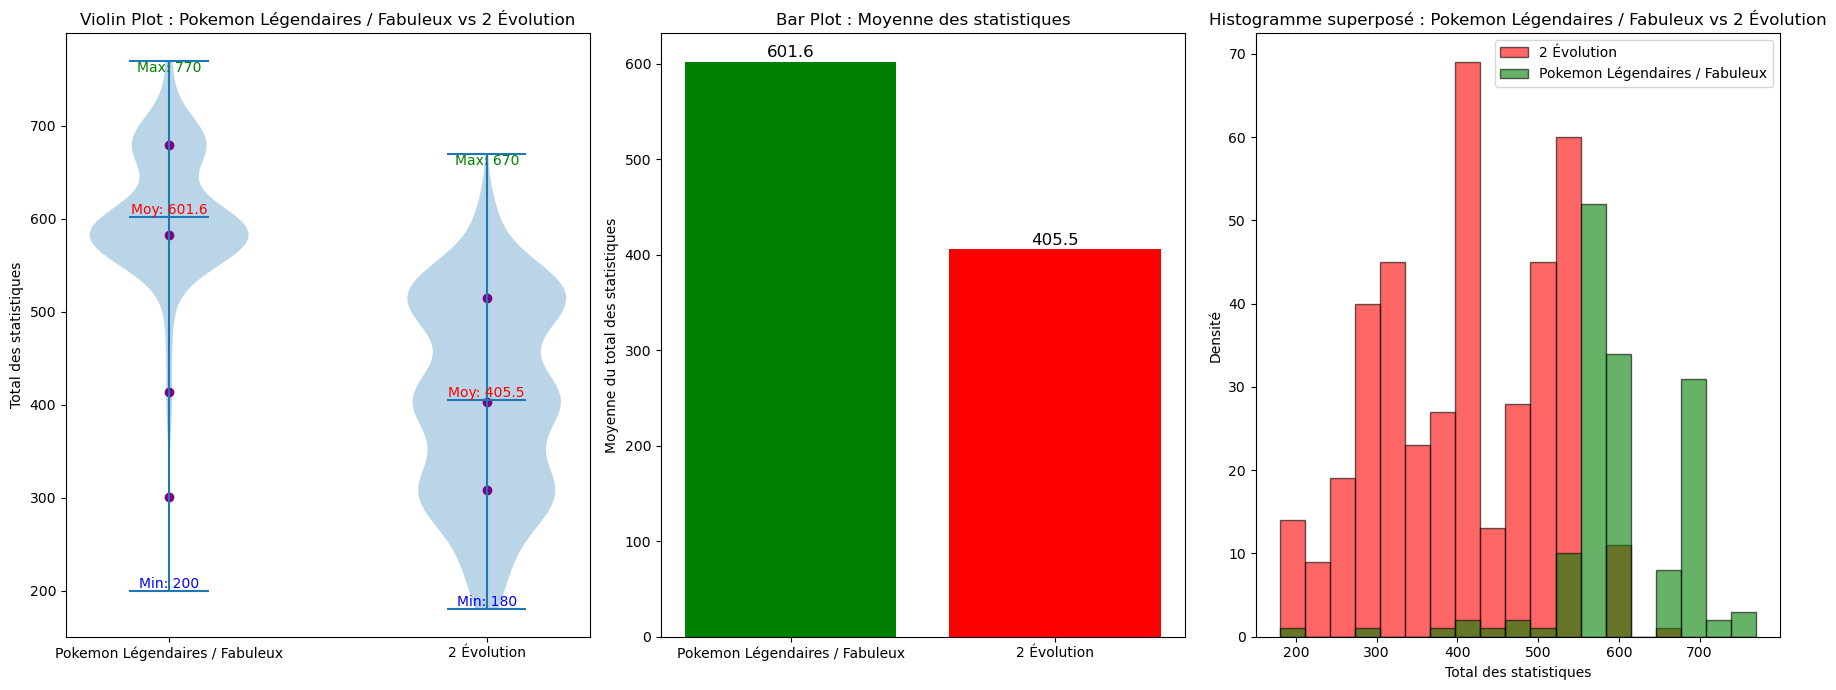

In [35]:

# Filtrer les Pok√©mon Pokemon L√©gendaires / Fabuleux et ceux ayant 1 √©volution
df_two_evolution = df_base_pokemon[df_base_pokemon['Color'] == 'red']  # Pok√©mon avec 1 √©volution

# Extraire les valeurs pour les statistiques de base
stats_two_evolution = df_two_evolution['Base Stat Total'].values
stats_legendary = df_legendary_pokemon['Base Stat Total'].values

# Calcul des statistiques pour affichage
mean_stats = [np.mean(stats_legendary), np.mean(stats_two_evolution)]
min_stats = [np.min(stats_legendary), np.min(stats_two_evolution)]
max_stats = [np.max(stats_legendary), np.max(stats_two_evolution)]


# Fonction pour trouver les pics (modes)
def find_peaks(data):
    kde = gaussian_kde(data)  # Densit√© de probabilit√©
    x_vals = np.linspace(min(data), max(data), 1000)
    y_vals = kde(x_vals)

    peak_indices = np.where((y_vals[1:-1] > y_vals[:-2]) & (y_vals[1:-1] > y_vals[2:]))[0] + 1
    peaks = x_vals[peak_indices]

    return peaks


peaks_legendary = find_peaks(stats_legendary)
peaks_two_evolution = find_peaks(stats_two_evolution)

# Cr√©ation du graphique
fig, ax = plt.subplots(1, 3, figsize=(18, 7))

# 1. Violin Plot avec stats et pics
parts = ax[0].violinplot([stats_legendary, stats_two_evolution], showmeans=True, showextrema=True)

# Ajouter les valeurs min, max et moyennes
for i, (mean, min_val, max_val, peaks) in enumerate(
        zip(mean_stats, min_stats, max_stats, [peaks_legendary, peaks_two_evolution]), start=1):
    ax[0].text(i, mean, f'Moy: {mean:.1f}', ha='center', va='bottom', fontsize=10, color='red')
    ax[0].text(i, min_val, f'Min: {min_val}', ha='center', va='bottom', fontsize=10, color='blue')
    ax[0].text(i, max_val, f'Max: {max_val}', ha='center', va='top', fontsize=10, color='green')

    # Ajouter les pics (modes)
    for peak in peaks:
        ax[0].scatter(i, peak, color='purple', marker='o', label='Pic' if i == 1 else "")

ax[0].set_xticks([1, 2])
ax[0].set_xticklabels(["Pokemon L√©gendaires / Fabuleux", "2 √âvolution"])
ax[0].set_title("Violin Plot : Pokemon L√©gendaires / Fabuleux vs 2 √âvolution")
ax[0].set_ylabel("Total des statistiques")

# 2. Bar Plot avec affichage des valeurs pr√©cises
bars = ax[1].bar(["Pokemon L√©gendaires / Fabuleux", "2 √âvolution"], mean_stats, color=['green', 'red'])

# Ajouter les valeurs des moyennes sur les barres
for bar, value in zip(bars, mean_stats):
    ax[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{value:.1f}', ha='center', fontsize=12)

ax[1].set_title("Bar Plot : Moyenne des statistiques")
ax[1].set_ylabel("Moyenne du total des statistiques")

# 3. Histogramme superpos√©
bins = np.linspace(min(min(stats_two_evolution), min(stats_legendary)),
                   max(max(stats_two_evolution), max(stats_legendary)), 20)

ax[2].hist(stats_two_evolution, bins=bins, color='red', alpha=0.6, label="2 √âvolution", edgecolor='black')
ax[2].hist(stats_legendary, bins=bins, color='green', alpha=0.6, label="Pokemon L√©gendaires / Fabuleux", edgecolor='black')

ax[2].set_title("Histogramme superpos√© : Pokemon L√©gendaires / Fabuleux vs 2 √âvolution")
ax[2].set_xlabel("Total des statistiques")
ax[2].set_ylabel("Densit√©")
ax[2].legend()

# Affichage du graphique
plt.tight_layout()
plt.show()

### Int√©r√™t du graphique et Analyse ###

M√™me logique que pr√©c√©demment, mais ici on compare les Pok√©mons l√©gendaires/fabuleux aux Pok√©mons avec **deux √©volutions**.

- **Violin Plot** : Bien que les Pok√©mons avec deux √©volutions aient une bonne r√©partition, leur moyenne est presque la m√™me que les Pok√©mons √† une √©volution, ils restent donc bien en dessous des l√©gendaires.
- **Bar Plot** : La diff√©rence de moyenne reste identique √† celle des Pok√©mons √† une seule √©volution, avec presque la m√™me diff√©rence de stat √©norme de 196.
- **Histogramme** : On remarque que certains Pok√©mon avec deux √©volutions atteignent le niveau de certains l√©gendaires, mais ils sont rares et le r√©sultat reste le m√™me que celui des Pokemon √† une seule √©volution : Pok√©mon l√©gendaire √† 550 et plus et Pok√©mon √† 2 √©volutions √† 550 et moins points de statistiques.


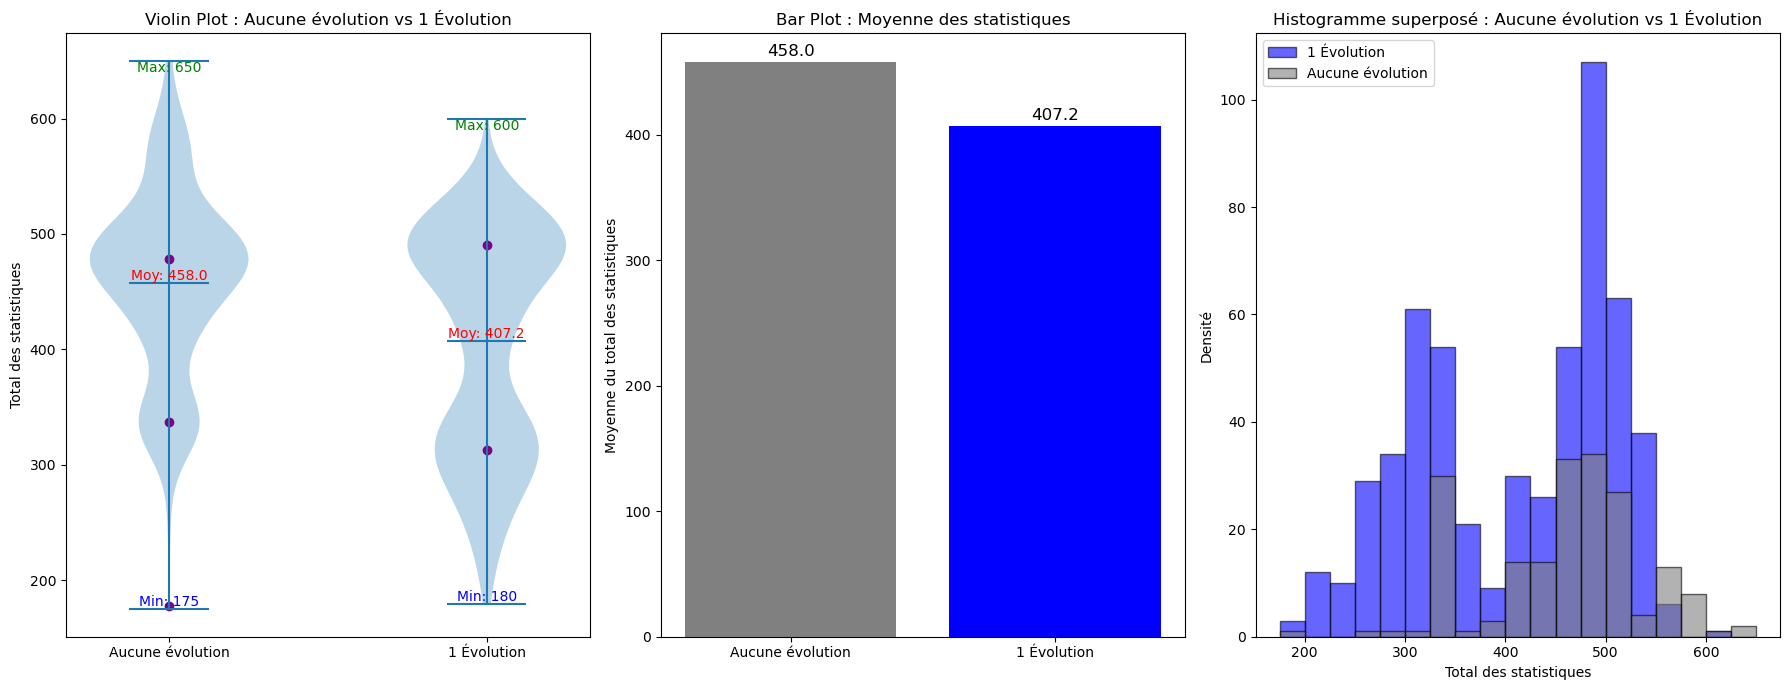

In [36]:
# Filtrer les Pok√©mon avec Aucune √©volution et ceux ayant 1 √©volution
df_none_evolution = df_base_pokemon[df_base_pokemon['Color'] == 'grey']

# Extraire les valeurs pour les statistiques de base
stats_none_evolution = df_none_evolution['Base Stat Total'].values

# Calcul des statistiques pour affichage
mean_stats = [np.mean(stats_none_evolution), np.mean(stats_single_evolution)]
min_stats = [np.min(stats_none_evolution), np.min(stats_single_evolution)]
max_stats = [np.max(stats_none_evolution), np.max(stats_single_evolution)]

# Fonction pour trouver les pics (modes)
def find_peaks(data):
    kde = gaussian_kde(data)  # Densit√© de probabilit√©
    x_vals = np.linspace(min(data), max(data), 1000)
    y_vals = kde(x_vals)

    peak_indices = np.where((y_vals[1:-1] > y_vals[:-2]) & (y_vals[1:-1] > y_vals[2:]))[0] + 1
    peaks = x_vals[peak_indices]

    return peaks

peaks_none_evolution = find_peaks(stats_none_evolution)

# Cr√©ation du graphique
fig, ax = plt.subplots(1, 3, figsize=(18, 7))

# 1. Violin Plot avec stats et pics
parts = ax[0].violinplot([stats_none_evolution, stats_single_evolution], showmeans=True, showextrema=True)

# Ajouter les valeurs min, max et moyennes
for i, (mean, min_val, max_val, peaks) in enumerate(zip(mean_stats, min_stats, max_stats, [peaks_none_evolution, peaks_single_evolution]), start=1):
    ax[0].text(i, mean, f'Moy: {mean:.1f}', ha='center', va='bottom', fontsize=10, color='red')
    ax[0].text(i, min_val, f'Min: {min_val}', ha='center', va='bottom', fontsize=10, color='blue')
    ax[0].text(i, max_val, f'Max: {max_val}', ha='center', va='top', fontsize=10, color='green')

    # Ajouter les pics (modes)
    for peak in peaks:
        ax[0].scatter(i, peak, color='purple', marker='o', label='Pic' if i == 1 else "")

ax[0].set_xticks([1, 2])
ax[0].set_xticklabels(["Aucune √©volution", "1 √âvolution"])
ax[0].set_title("Violin Plot : Aucune √©volution vs 1 √âvolution")
ax[0].set_ylabel("Total des statistiques")

# 2. Bar Plot avec affichage des valeurs pr√©cises
bars = ax[1].bar(["Aucune √©volution", "1 √âvolution"], mean_stats, color=['grey', 'blue'])

# Ajouter les valeurs des moyenes sur les barres
for bar, value in zip(bars, mean_stats):
    ax[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{value:.1f}', ha='center', fontsize=12)

ax[1].set_title("Bar Plot : Moyenne des statistiques")
ax[1].set_ylabel("Moyenne du total des statistiques")

# 3. Histogramme superpos√©
bins = np.linspace(min(min(stats_single_evolution), min(stats_none_evolution)),
                   max(max(stats_single_evolution), max(stats_none_evolution)), 20)

ax[2].hist(stats_single_evolution, bins=bins, color='blue', alpha=0.6, label="1 √âvolution", edgecolor='black')
ax[2].hist(stats_none_evolution, bins=bins, color='grey', alpha=0.6, label="Aucune √©volution", edgecolor='black')

ax[2].set_title("Histogramme superpos√© : Aucune √©volution vs 1 √âvolution")
ax[2].set_xlabel("Total des statistiques")
ax[2].set_ylabel("Densit√©")
ax[2].legend()

# Affichage du graphique
plt.tight_layout()
plt.show()


### Int√©r√™t du graphique et Analyse ###

Ces graphiques comparent uniquement les Pok√©mons non l√©gendaires, entre ceux **sans √©volution** et ceux **ayant une seule**.

- **Violin Plot** : On voit une l√©g√®re sup√©riorit√© des Pok√©mons sans √©volution. Les moyennes et les extr√™mes indiquent que ceux qui √©voluent ont tendance √† √™tre plus faibles. 
- **Bar Plot** : Les moyennes des statistiques montrent que les Pok√©mons sans √©volution d√©passent les Pok√©mons avec une seule √©volution, avec une solide diff√©rence de 51 points.
- **Histogramme** : Les Pok√©mons avec 1 √©volution ont en moyenne de meilleures statistiques de base que ceux sans aucune √©volution. Ils sont non seulement plus nombreux dans les tranches √©lev√©es, mais ont aussi un pic significatif autour de 500 points. Quelques Pok√©mons √† une √©volution d√©passent 500 points mais ils sont majoritairement entre 300 et 450 points.


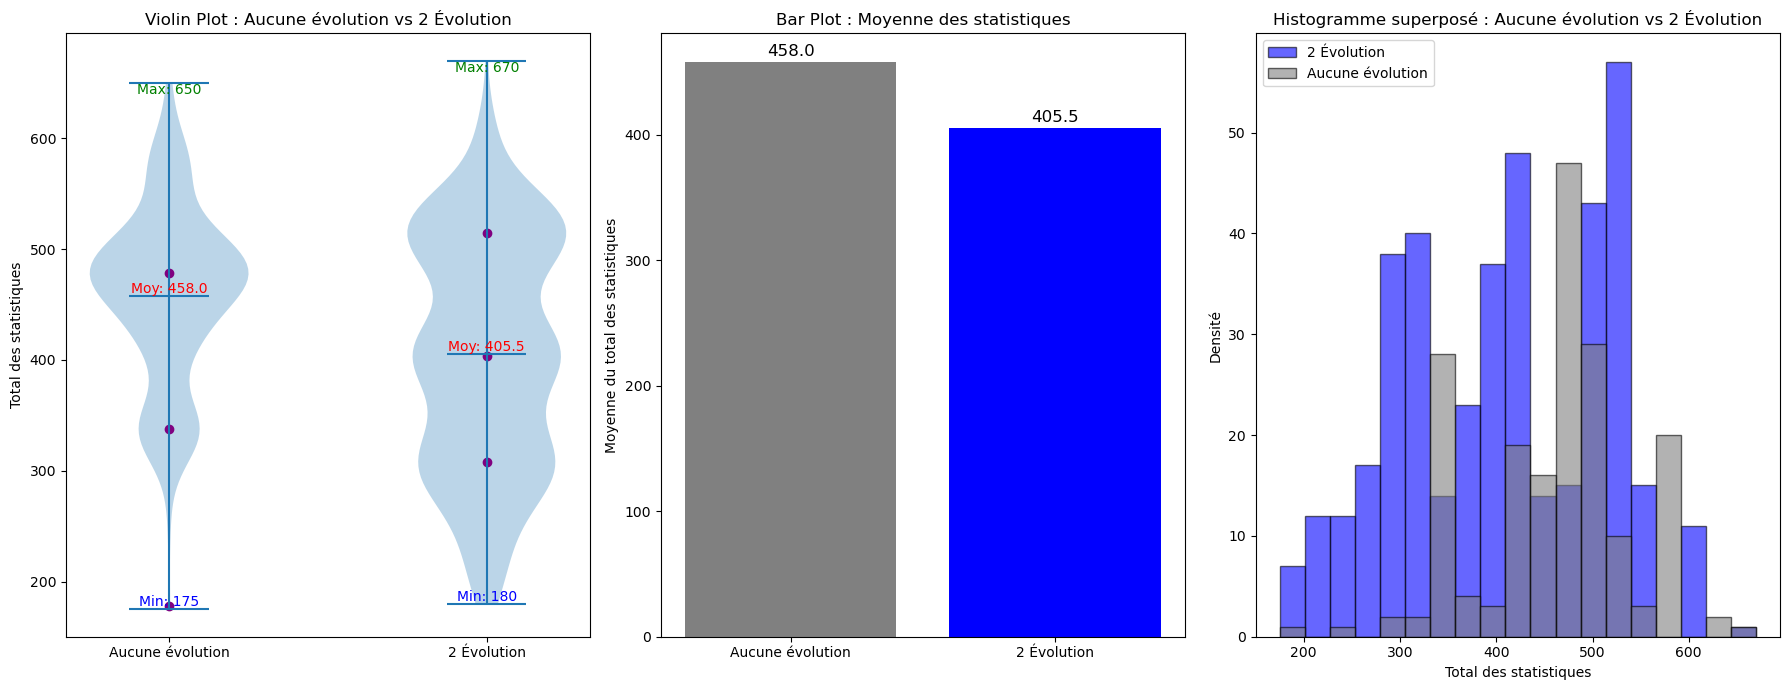

In [37]:

# Calcul des statistiques pour affichage
mean_stats = [np.mean(stats_none_evolution), np.mean(stats_two_evolution)]
min_stats = [np.min(stats_none_evolution), np.min(stats_two_evolution)]
max_stats = [np.max(stats_none_evolution), np.max(stats_two_evolution)]

# Fonction pour trouver les pics (modes)
def find_peaks(data):
    kde = gaussian_kde(data)  # Densit√© de probabilit√©
    x_vals = np.linspace(min(data), max(data), 1000)
    y_vals = kde(x_vals)

    peak_indices = np.where((y_vals[1:-1] > y_vals[:-2]) & (y_vals[1:-1] > y_vals[2:]))[0] + 1
    peaks = x_vals[peak_indices]

    return peaks

peaks_none_evolution = find_peaks(stats_none_evolution)

# Cr√©ation du graphique
fig, ax = plt.subplots(1, 3, figsize=(18, 7))

# 1. Violin Plot avec stats et pics
parts = ax[0].violinplot([stats_none_evolution, stats_two_evolution], showmeans=True, showextrema=True)

# Ajouter les valeurs min, max et moyennes
for i, (mean, min_val, max_val, peaks) in enumerate(zip(mean_stats, min_stats, max_stats, [peaks_none_evolution, peaks_two_evolution]), start=1):
    ax[0].text(i, mean, f'Moy: {mean:.1f}', ha='center', va='bottom', fontsize=10, color='red')
    ax[0].text(i, min_val, f'Min: {min_val}', ha='center', va='bottom', fontsize=10, color='blue')
    ax[0].text(i, max_val, f'Max: {max_val}', ha='center', va='top', fontsize=10, color='green')

    # Ajouter les pics (modes)
    for peak in peaks:
        ax[0].scatter(i, peak, color='purple', marker='o', label='Pic' if i == 1 else "")

ax[0].set_xticks([1, 2])
ax[0].set_xticklabels(["Aucune √©volution", "2 √âvolution"])
ax[0].set_title("Violin Plot : Aucune √©volution vs 2 √âvolution")
ax[0].set_ylabel("Total des statistiques")

# 2. Bar Plot avec affichage des valeurs pr√©cises
bars = ax[1].bar(["Aucune √©volution", "2 √âvolution"], mean_stats, color=['grey', 'blue'])

# Ajouter les valeurs des moyenes sur les barres
for bar, value in zip(bars, mean_stats):
    ax[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{value:.1f}', ha='center', fontsize=12)

ax[1].set_title("Bar Plot : Moyenne des statistiques")
ax[1].set_ylabel("Moyenne du total des statistiques")

# 3. Histogramme superpos√©
bins = np.linspace(min(min(stats_two_evolution), min(stats_none_evolution)),
                   max(max(stats_two_evolution), max(stats_none_evolution)), 20)

ax[2].hist(stats_two_evolution, bins=bins, color='blue', alpha=0.6, label="2 √âvolution", edgecolor='black')
ax[2].hist(stats_none_evolution, bins=bins, color='grey', alpha=0.6, label="Aucune √©volution", edgecolor='black')

ax[2].set_title("Histogramme superpos√© : Aucune √©volution vs 2 √âvolution")
ax[2].set_xlabel("Total des statistiques")
ax[2].set_ylabel("Densit√©")
ax[2].legend()

# Affichage du graphique
plt.tight_layout()
plt.show()


### Int√©r√™t du graphique et Analyse ###

Ici on compare les extr√™mes : Pok√©mons sans √©volution et ceux avec deux √©volutions.

- **Violin Plot** : La plus grande r√©parition des Pok√©mons √† deux √©volution en termes de total de statistiques cr√©e une moyenne plus basse que celle des Pok√©mons sans √©volution, malgr√© un pic plus haut que celui des Pok√©mons sans √©volution (458 points) √† 510 points.
- **Bar Plot** : Les moyennes des statistiques montrent que les Pok√©mons sans √©volution d√©passent les Pok√©mons avec deux √©volution, avec une solide diff√©rence de 53 points.
- **Histogramme** : On observe deux distributions bien distinctes, les Pok√©mons √† deux √©volution sont tr√®s r√©partis, entre 150 et 600, l√† o√π les Pok√©mons sans √©volution sont group√©s √† 350, 480 et 580 points. Cela montre que malgr√© la moyenne des statistiques des Pok√©mons sans √©volution plus haute, certains Pok√©mons √† deux √©volution sont sup√©rieur. 

# Conclusion de l'analyse

√Ä travers l‚Äôanalyse des statistiques des Pok√©mon selon leur statut (l√©gendaire ou non) et leur nombre d‚Äô√©volutions, nous pouvons tirer plusieurs constats :

- Les Pok√©mons l√©gendaires/fabuleux poss√®dent des statistiques de base nettement sup√©rieures aux Pok√©mons normaux. Leur moyenne est √† 602 points, contre 415 pour les autres. Ils doivent donc √™tre √©tudi√©s s√©par√©ment, afin de ne pas fausser les comparaisons.

- Comme attendu pour les Pok√©mons l√©gendaires, les r√©sultats obtenus sont qu'ils ont beaucoup plus de statistiques que les Pok√©mons √† √©volution, avec quand m√™me quelques petites exceptions. Ils peuvent donc √™tre des atouts de taille dans le rush, cependant leur puissance vient avec une tr√®s grande difficult√© de capture et il n'est possible d'en capturer qu'apr√®s la league Pok√©mon pour la plupart, g√©n√©ralement il n'y en a qu'un seul qui est disponible avant la league Pok√©mon. Le choix d'un Pok√©mon l√©gendaire est donc le meilleur mais aussi le plus demandant en termes de conditions.

- Concernant les Pok√©mons non l√©gendaires, les r√©sultats obtenus vont √† l‚Äôencontre des attentes classiques :

   Les Pok√©mons sans √©volution ont, en moyenne, des statistiques nettement plus √©lev√©es que ceux qui poss√®dent une ou deux √©volutions, autrement dit, les Pok√©mons √† √©volution repr√©sente un investissement, alors que les Pok√©mons sans √©volution repr√©sente une valeur sure d√®s l'obtention.

‚ùì Cette observation peut s'expliquer par le fait que ces Pok√©mons sans √©volution sont souvent con√ßus pour √™tre directement viables en l'√©tat (ex : Pok√©mons obtenus tardivement, ou formes uniques).
√Ä l‚Äôinverse, les Pok√©mons √©volutifs ont une progression plus √©tal√©e ou unique.



**R√©ponse √† la probl√©matique** :  
Non, il n'existe pas une diff√©rence notable de statistiques selon le nombre d‚Äô√©volutions. L‚Äô√©volution ne semble pas d√©terminant en termes de statistiques dans la puissance globale d‚Äôun Pok√©mon, voir l'inverse. Visible par le fait que les Pok√©mons sans √©volution poss√©dent plus de statistiques que les Pok√©mons √©voluant. En se basant donc seulement sur les statistiques, les Pok√©mons sans √©volution semble √™tre les plus int√©ressants pour constituer une √©quipe pour un rush, avec un voir deux Pok√©mons √† √©volution bien choisi.

# De quoi approfondir le sujet 


L'analyse a montr√© que les statistiques jouent en la d√©faveur des Pok√©mons √† √©volution. Voici une th√©orie formul√©e par nos soins pour en trouver la raison : 

- D√©finition talents dans Pok√©mon : les talents sont des capacit√©s inn√©s aux Pok√©mons qui peuvent s'am√©liorer gr√¢ce aux √©volutions.

- D√©finition moovesets dans Pok√©mon : les moovesets (combinaison d'attaques limit√©s √† 4) puissants sont accessibles aux Pok√©mons dans leur forme finale (derni√®re √©volution ou aucune √©volution et haut niveau).

- D√©finition synergies dans Pok√©mon : les synergies sont des combinaison avantageuses de moovesets puissants et de talents puissants qui marchent souvent sous des conditions pr√©cises.

- Les moovesets des Pok√©mon √©volu√©s pourraient leur permettre de cr√©er un environnement o√π leur talent r√©v√®le tout son potentiel.

Les Pok√©mons √† √©volution pourraient donc gagner des synergies √† la place des statistiques afin de compenser la diff√©rence de statistiques.

Afin de tester cette th√©orie il faudrait avoir acc√®s √† des donn√©es qui donne une valeur comp√©titive aux synergies de tout les Pok√©mons. Cela permettrait de voir si les Pok√©mons √† √©volution repr√©sentent un bon investissement long terme ou un trop lourd fardeau pour le rush.